In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
dataset = pd.read_csv("E:\python\diamonds.csv")

In [3]:
dataset

,srno,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
dataset.drop(columns = ["srno"],inplace=True)

In [5]:
dataset.shape

(53940, 10)

In [6]:
dataset.index

RangeIndex(start=0, stop=53940, step=1)

In [7]:
dataset.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
dataset.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
# Reading Specific Columns
print (dataset.loc[:,['carat','cut','clarity','price','x']])

       carat        cut clarity  price     x
0       0.23      Ideal     SI2    326  3.95
1       0.21    Premium     SI1    326  3.89
2       0.23       Good     VS1    327  4.05
3       0.29    Premium     VS2    334  4.20
4       0.31       Good     SI2    335  4.34
...      ...        ...     ...    ...   ...
53935   0.72      Ideal     SI1   2757  5.75
53936   0.72       Good     SI1   2757  5.69
53937   0.70  Very Good     SI1   2757  5.66
53938   0.86    Premium     SI2   2757  6.15
53939   0.75      Ideal     SI2   2757  5.83

[53940 rows x 5 columns]


In [12]:
from sklearn import preprocessing

In [13]:
p=dataset.iloc[:,]
p

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [14]:
le=preprocessing.LabelEncoder()
p=p.apply(le.fit_transform).head()
dataset.carat = le.fit_transform(dataset.carat)
dataset.cut = le.fit_transform(dataset.cut)
dataset.color = le.fit_transform(dataset.color)
dataset.clarity = le.fit_transform(dataset.clarity)
dataset.depth = le.fit_transform(dataset.depth)
dataset.price = le.fit_transform(dataset.price)
#dataset.x = le.fit_transform(dataset.x)
#dataset.y = le.fit_transform(dataset.y)
#dataset.z= le.fit_transform(dataset.z)


In [15]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,3,2,1,3,83,55.0,0,3.95,3.98,2.43
1,1,3,1,2,66,61.0,0,3.89,3.84,2.31
2,3,1,1,4,37,65.0,1,4.05,4.07,2.31
3,9,3,5,5,92,58.0,2,4.20,4.23,2.63
4,11,1,6,3,101,58.0,3,4.34,4.35,2.75


In [16]:
correlations = dataset.corr()

<AxesSubplot:>

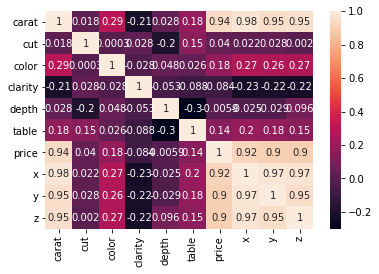

In [17]:
sns.heatmap(correlations, annot = True)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
p=sc.fit_transform(p)
p

array([[-0.61885275,  0.        , -0.80822386, -0.39223227,  0.31877136,
        -1.4112782 , -1.02899151, -0.82547131, -0.6330989 , -0.31752645],
       [-1.13456337,  1.11803399, -0.80822386, -1.37281295, -0.43388324,
         0.65400697, -1.02899151, -1.18964983, -1.41058877, -0.99794027],
       [-0.61885275, -1.11803399, -0.80822386,  0.58834841, -1.71782344,
         1.51454246, -0.17149859, -0.21850711, -0.13328398, -0.99794027],
       [ 0.92827912,  1.11803399,  0.98782916,  1.56892908,  0.71723556,
        -0.37863561,  0.68599434,  0.69193919,  0.75527588,  0.81649658],
       [ 1.44398974, -1.11803399,  1.43684242, -0.39223227,  1.11569976,
        -0.37863561,  1.54348727,  1.54168907,  1.42169577,  1.4969104 ]])

In [18]:
#min max normalzition
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
p= min_max.fit_transform(p)
p

array([[0.2       , 0.5       , 0.        , 0.33333333, 0.71875   ,
        0.        , 0.        , 0.13333333, 0.2745098 , 0.27272727],
       [0.        , 1.        , 0.        , 0.        , 0.453125  ,
        0.70588235, 0.        , 0.        , 0.        , 0.        ],
       [0.2       , 0.        , 0.        , 0.66666667, 0.        ,
        1.        , 0.33333333, 0.35555556, 0.45098039, 0.        ],
       [0.8       , 1.        , 0.8       , 1.        , 0.859375  ,
        0.35294118, 0.66666667, 0.68888889, 0.76470588, 0.72727273],
       [1.        , 0.        , 1.        , 0.33333333, 1.        ,
        0.35294118, 1.        , 1.        , 1.        , 1.        ]])

In [20]:
q=dataset.iloc[:,]
q

,carat,cut,color,clarity,depth,table,price,x,y,z
0,3,2,1,3,83,55.0,0,3.95,3.98,2.43
1,1,3,1,2,66,61.0,0,3.89,3.84,2.31
2,3,1,1,4,37,65.0,1,4.05,4.07,2.31
3,9,3,5,5,92,58.0,2,4.20,4.23,2.63
4,11,1,6,3,101,58.0,3,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,52,2,0,2,76,57.0,2300,5.75,5.76,3.50
53936,52,1,0,2,99,55.0,2300,5.69,5.75,3.61
53937,50,4,0,2,96,60.0,2300,5.66,5.68,3.56
53938,66,3,4,3,78,58.0,2300,6.15,6.12,3.74


In [21]:
#4.Data transformation 
from sklearn.preprocessing import OneHotEncoder
enc= OneHotEncoder()
enc.fit_transform(q).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

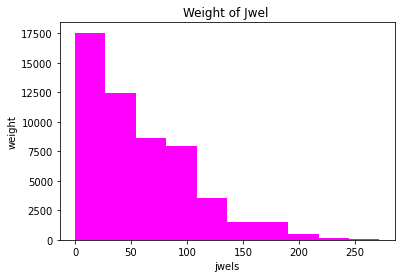

<Figure size 432x288 with 0 Axes>

In [22]:
plt.hist(dataset['carat'],color='magenta',orientation='vertical')
plt.title('Weight of Jwel ')
plt.xlabel('jwels')
plt.ylabel('weight')
plt.show()
plt.savefig('jwel.png', dpi=300)  
plt.savefig('jwel.pdf') 

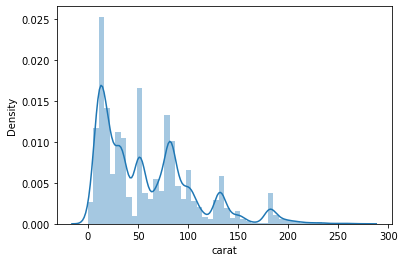

In [23]:
sns.distplot(dataset["carat"])
plt.savefig('jwel1.png')
plt.savefig('jwel1.pdf')

In [24]:
#to print all the interactive output without resorting to print, not only the last result.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import squarify
import matplotlib

In [25]:
dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,3,2,1,3,83,55.0,0,3.95,3.98,2.43
1,1,3,1,2,66,61.0,0,3.89,3.84,2.31
2,3,1,1,4,37,65.0,1,4.05,4.07,2.31
3,9,3,5,5,92,58.0,2,4.20,4.23,2.63
4,11,1,6,3,101,58.0,3,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,52,2,0,2,76,57.0,2300,5.75,5.76,3.50
53936,52,1,0,2,99,55.0,2300,5.69,5.75,3.61
53937,50,4,0,2,96,60.0,2300,5.66,5.68,3.56
53938,66,3,4,3,78,58.0,2300,6.15,6.12,3.74


In [26]:
dataset.to_csv("diamonds.csv")

In [27]:
#apriori
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,3,2,1,3,83,55.0,0,3.95,3.98,2.43
1,1,3,1,2,66,61.0,0,3.89,3.84,2.31
2,3,1,1,4,37,65.0,1,4.05,4.07,2.31
3,9,3,5,5,92,58.0,2,4.20,4.23,2.63
4,11,1,6,3,101,58.0,3,4.34,4.35,2.75


In [28]:
z=dataset.drop(columns = ['cut','color','clarity','carat','depth','table','price'])
z

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
2,4.05,4.07,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75
...,...,...,...
53935,5.75,5.76,3.50
53936,5.69,5.75,3.61
53937,5.66,5.68,3.56
53938,6.15,6.12,3.74


In [29]:
bin_labels= [0,1]
z['xnew'] = pd.cut(z['x'], bins=[0.00,5.00,10.00], labels=bin_labels)


z['ynew'] = pd.cut(z['y'], bins=[0.00,5.00,10.00], labels=bin_labels)


z['znew'] = pd.cut(z['z'], bins=[0.00,5.00,10.00], labels=bin_labels)
h=z


In [30]:
h

,x,y,z,xnew,ynew,znew
0,3.95,3.98,2.43,0,0,0
1,3.89,3.84,2.31,0,0,0
2,4.05,4.07,2.31,0,0,0
3,4.20,4.23,2.63,0,0,0
4,4.34,4.35,2.75,0,0,0
...,...,...,...,...,...,...
53935,5.75,5.76,3.50,1,1,0
53936,5.69,5.75,3.61,1,1,0
53937,5.66,5.68,3.56,1,1,0
53938,6.15,6.12,3.74,1,1,0


In [31]:
h=z.drop(columns = ['x','y','z'])
h
h.shape

,xnew,ynew,znew
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
53935,1,1,0
53936,1,1,0
53937,1,1,0
53938,1,1,0


(53940, 3)

In [32]:
#h['xnew'].dropna(inplace=True)
#h['ynew'].dropna(inplace=True)
h.dropna(inplace=True)

In [33]:
h.shape

(53912, 3)

In [34]:
from mlxtend.frequent_patterns import apriori # machine learning xtend tool for apriori algorithm
from mlxtend.frequent_patterns import association_rules # machine learning xtend tool for association rules

In [35]:
freq_items=apriori(h,min_support=0.05,use_colnames=True)
freq_items

,support,itemsets
0,0.673338,(xnew)
1,0.673282,(ynew)
2,0.671019,"(xnew, ynew)"


In [36]:
res=association_rules(freq_items,metric="lift",min_threshold=1)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(xnew),(ynew),0.673338,0.673282,0.671019,0.996557,1.480147,0.217673,94.881409
1,(ynew),(xnew),0.673282,0.673338,0.671019,0.996639,1.480147,0.217673,97.189968


In [37]:
frequent_itemsets = apriori(h, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.head()

,support,itemsets,length
0,0.673338,(xnew),1
1,0.673282,(ynew),1
2,0.671019,"(xnew, ynew)",2


In [38]:
#fp growth tree
from mlxtend.frequent_patterns import fpgrowth

In [39]:
#running the fpgrowth algorithm
res=fpgrowth(h,min_support=0.5,use_colnames=True)

In [40]:
res.head()

,support,itemsets
0,0.673338,(xnew)
1,0.673282,(ynew)
2,0.671019,"(xnew, ynew)"


In [41]:
ser=association_rules(res,metric="lift",min_threshold=1)
ser.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(xnew),(ynew),0.673338,0.673282,0.671019,0.996557,1.480147,0.217673,94.881409
1,(ynew),(xnew),0.673282,0.673338,0.671019,0.996639,1.480147,0.217673,97.189968


In [42]:
#apriori vs fpgrowth
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(h,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

,support,itemsets
0,0.673338,(xnew)
1,0.673282,(ynew)
2,0.026877,(znew)
3,0.671019,"(xnew, ynew)"
4,0.026877,"(xnew, znew)"
5,0.026877,"(znew, ynew)"
6,0.026877,"(xnew, znew, ynew)"


,support,itemsets
0,0.673338,(xnew)
1,0.673282,(ynew)
2,0.026877,(znew)
3,0.671019,"(xnew, ynew)"
4,0.026877,"(xnew, znew)"
5,0.026877,"(znew, ynew)"
6,0.026877,"(xnew, znew, ynew)"


,support,itemsets
0,0.673338,(xnew)
1,0.673282,(ynew)
2,0.671019,"(xnew, ynew)"


,support,itemsets
0,0.673338,(xnew)
1,0.673282,(ynew)
2,0.671019,"(xnew, ynew)"


,support,itemsets
0,0.673338,(xnew)
1,0.673282,(ynew)
2,0.671019,"(xnew, ynew)"


In [43]:
l=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(h,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

,support,itemsets
0,0.673338,(xnew)
1,0.673282,(ynew)
2,0.026877,(znew)
3,0.671019,"(xnew, ynew)"
4,0.026877,"(znew, ynew)"
5,0.026877,"(xnew, znew)"
6,0.026877,"(xnew, znew, ynew)"


,support,itemsets
0,0.673338,(xnew)
1,0.673282,(ynew)
2,0.026877,(znew)
3,0.671019,"(xnew, ynew)"
4,0.026877,"(znew, ynew)"
5,0.026877,"(xnew, znew)"
6,0.026877,"(xnew, znew, ynew)"


,support,itemsets
0,0.673338,(xnew)
1,0.673282,(ynew)
2,0.671019,"(xnew, ynew)"


,support,itemsets
0,0.673338,(xnew)
1,0.673282,(ynew)
2,0.671019,"(xnew, ynew)"


,support,itemsets
0,0.673338,(xnew)
1,0.673282,(ynew)
2,0.671019,"(xnew, ynew)"


<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Min_support Threshold')

Text(0, 0.5, 'Run Time in ms')

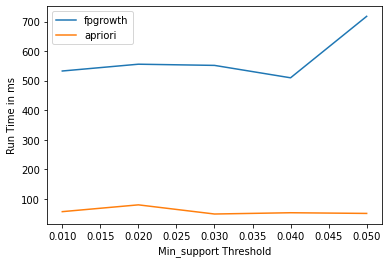

In [44]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")

In [45]:
#decision tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [46]:
h

,xnew,ynew,znew
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
53935,1,1,0
53936,1,1,0
53937,1,1,0
53938,1,1,0


In [47]:
#split dataset in features and target variable
feature_cols = ['xnew', 'ynew', 'znew']
a = h[feature_cols] # Features
b = h.ynew # Target variable

In [48]:
# Split dataset into training set and test set
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=1) # 70% training and 30% test

In [49]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(a_train,b_train)

#Predict the response for test dataset
b_pred = clf.predict(a_test)

In [50]:
print("Accuracy:",metrics.accuracy_score(b_test, b_pred)) #evaluating model

Accuracy: 1.0


In [51]:
#pip install GraphViz

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [51]:
#visualization and decisison tree 
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dbt.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [52]:
#kmeans
import numpy as np
import pandas as pd
import warnings
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

KMeans(n_clusters=1, n_init=12, random_state=0)

KMeans(n_clusters=2, n_init=12, random_state=0)

KMeans(n_clusters=3, n_init=12, random_state=0)

KMeans(n_clusters=4, n_init=12, random_state=0)

KMeans(n_clusters=5, n_init=12, random_state=0)

KMeans(n_clusters=6, n_init=12, random_state=0)

KMeans(n_clusters=7, n_init=12, random_state=0)

KMeans(n_init=12, random_state=0)

KMeans(n_clusters=9, n_init=12, random_state=0)

KMeans(n_clusters=10, n_init=12, random_state=0)

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

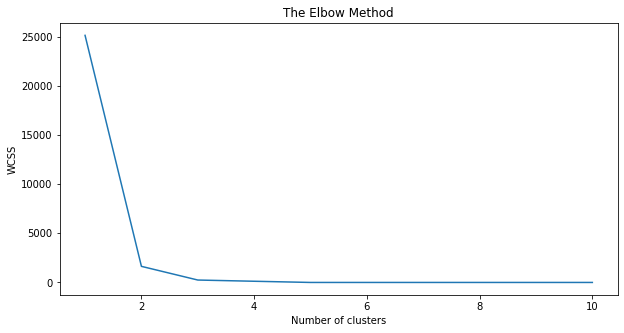

In [53]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(a)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(10,5))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
b_kmeans = kmeans.fit_predict(a)

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'clusters')

Text(0.5, 0, 'x-axis (k$)')

Text(0, 0.5, 'y-axis')

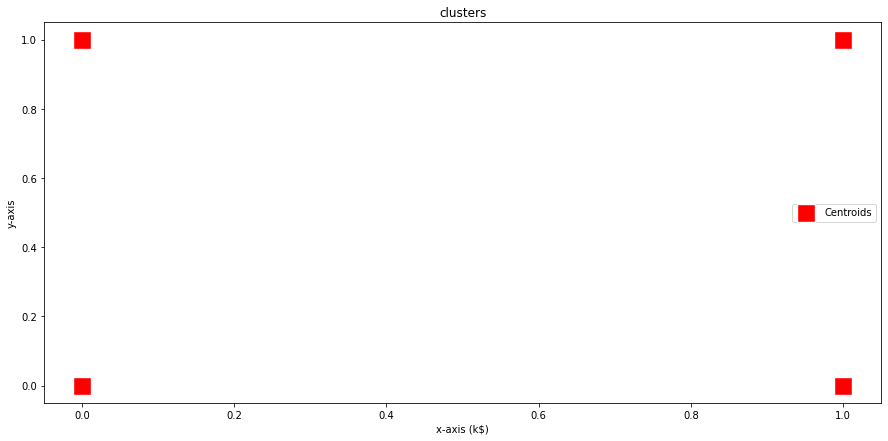

In [55]:
plt.figure(figsize=(15,7))
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('clusters')
plt.xlabel('x-axis (k$)')
plt.ylabel('y-axis')
plt.legend()
plt.show()
